<a href="https://colab.research.google.com/github/jukaLST/techdataanalysis/blob/main/J_Ostanina_Olszewska_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project

In [ ]:
!pip install spacy
!python -m spacy download pl_core_news_sm
!pip install matplotlib

In [ ]:
# read dane8.csv and create pandas DataFrame

import pandas as pd
import numpy as np
import spacy
from spacy.lang.pl.stop_words import STOP_WORDS
import matplotlib.pyplot as plt



df = pd.read_csv('dane8.csv')
df.head()



,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Thu Dec 01 15:29:44 +0000 2022,NaN,NaN,NaN,4,1598338566471520258,prezydentpl,1.598246e+18,4.393274e+07,...,44,177,0,NaN,CasusBelli,SlavCasusBelli,1726,NaN,NaN,False
1,NaN,Thu Dec 01 13:28:05 +0000 2022,NaN,NaN,NaN,2,1598307952502374400,Piotr69450735,1.598306e+18,1.102908e+18,...,5838,4877,12,NaN,🇵🇱 Jupiter💯✌ 🇵🇱,Jupiter300571,57766,NaN,NaN,False
2,NaN,Thu Dec 01 13:31:57 +0000 2022,NaN,NaN,NaN,1,1598308922967953410,Piechocinski,1.598062e+18,3.231774e+08,...,49,79,0,NaN,Artur,artur_atl,10685,NaN,NaN,False
3,NaN,Thu Dec 01 16:41:52 +0000 2022,NaN,NaN,http://energetyczna.Za,1,1598356719838629890,marek67r,1.598194e+18,2.261166e+09,...,124,31,10,Niebo,Kicia micia prosto z mostu!Bez ogródek !,Joannazielenie2,25735,NaN,NaN,False
4,NaN,Thu Dec 01 15:54:40 +0000 2022,NaN,NaN,NaN,0,1598344839904591875,Adam52724763,1.598344e+18,1.320265e+18,...,1164,1132,12,Warszawa,Piotr Kross,Piotr18658370,16287,NaN,NaN,False


# Part 1 - Processing and cleaning the data

* Replace abbreviated weekday names with english equivalents (full weekday names) - created_at column
* Replace abbreviated month names with numerical equivalents (e.g. Jun to 06) - user_created_at column
* Get all links to tweets and pass them to the list
* Get all links found in tweets and pass them to the list (urls column)
* Get all image links and pass them to the list (media column)
* Remove all words marked as stopwords and pass the cleaned text to a new column called text_without_stopwords.


In [ ]:
# convert 'created_at' column to string  using format
# e.g. Thursday 12 01 16:41:52 +0000 2022

df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
# convert datetime to string
df['created_at'] = df['created_at'].dt.strftime('%A %b %d %H:%M:%S +0000 %Y')

df['user_created_at'] = pd.to_datetime(df['user_created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
# convert datetime to string
df['user_created_at'] = df['user_created_at'].dt.strftime('%a %m %d %H:%M:%S +0000 %Y')

# display user_created_at and created_at columns for first 5 rows
print(df[['created_at', 'user_created_at']].head())


                            created_at                user_created_at
0  Thursday Dec 01 15:29:44 +0000 2022  Wed 03 09 09:27:43 +0000 2022
1  Thursday Dec 01 13:28:05 +0000 2022  Thu 10 03 16:49:31 +0000 2019
2  Thursday Dec 01 13:31:57 +0000 2022  Fri 08 14 12:18:51 +0000 2009
3  Thursday Dec 01 16:41:52 +0000 2022  Tue 11 30 11:56:11 +0000 2021
4  Thursday Dec 01 15:54:40 +0000 2022  Tue 02 27 08:30:00 +0000 2018


In [ ]:
# Get all links to tweets and pass them to the list
links = [l for l in df['tweet_url']]
links

['https://twitter.com/SlavCasusBelli/status/1598338566471520258',
 'https://twitter.com/Jupiter300571/status/1598307952502374400',
 'https://twitter.com/artur_atl/status/1598308922967953410',
 'https://twitter.com/Joannazielenie2/status/1598356719838629890',
 'https://twitter.com/Piotr18658370/status/1598344839904591875',
 'https://twitter.com/michal_hadron/status/1598315669413576705',
 'https://twitter.com/Fil_Stankiewicz/status/1598360988528435201',
 'https://twitter.com/WojewodaSlaski/status/1598321711484657664',
 'https://twitter.com/WojewodaSlaski/status/1598321698792677378',
 'https://twitter.com/Dermod04383578/status/1598356078160404480',
 'https://twitter.com/GajewskaEdyta/status/1598310060530221057',
 'https://twitter.com/ukasz68577710/status/1598326312871104512',
 'https://twitter.com/Dyskusyjny2/status/1598369847901097997',
 'https://twitter.com/forestinababina/status/1598318300223750146',
 'https://twitter.com/AlbertSzpilman/status/1598366625958268928',
 'https://twitter.co

In [ ]:
# Get all links found in tweets and pass them to the list (urls column)
urls = [u for u in df['urls'] if not pd.isnull(u)]
urls

['http://energetyczna.Za',
 'https://youtu.be/2CsiBNm2oYQ',
 'https://lodz.wyborcza.pl/lodz/7,35136,29209422,wegiel-przyjechal-od-1-grudnia-mozna-go-kupic-w-mpo-ile-kosztuje.html',
 'https://radiolodz.pl/wegiel-w-lodzkiem-dystrybucja,118602/',
 'https://twitter.com/WBeatak/status/1571860193243185156',
 'https://eurovoix.com/2022/12/01/roksana-wegiel-junior-eurovision-2022/',
 'http://dziennik-eurowizyjny.pl/2022/12/01/ukraina-prezentuje-utwory-na-konkurs-kiedy-premiera-utworu-cypru-na-eurowizje-2023-kerfus-z-armenii-poprowadzi-eurowizje-junior-roksana-wegiel-nie-leci-do-erywania/',
 'https://tarnogorski.info/likwiduja-kopalnia-krupinski/',
 'https://300gospodarka.pl/news/arp-w-pazdzierniku-krajowy-wegiel-2-3-krotnie-drozszy-niz-przed-rokiem',
 'https://www.youtube.com/watch?v=-mdhLWeBUj4',
 'http://www.cieplo.gov.pl',
 'http://www.rmf24.pl/regiony/lublin/news-ruszyla-dystrybucja-wegla-dla-mieszkancow-lublina,nId,6446309',
 'https://www.youtube.com/watch?v=-mdhLWeBUj4',
 'https://biznes

In [ ]:
# Get all image links and pass them to the list (media column)
media = [m for m in df['media'] if not pd.isnull(m)]
media


['https://twitter.com/WojewodaSlaski/status/1598321711484657664/photo/1',
 'https://twitter.com/WojewodaSlaski/status/1598321698792677378/photo/1',
 'https://twitter.com/Dyskusyjny2/status/1598369847901097997/photo/1',
 'https://twitter.com/ann56502906/status/1598334251900063745/video/1',
 'https://twitter.com/Euromen1Tomasz/status/1598322328529772545/photo/1',
 'https://twitter.com/StadnickiM/status/1598329423299858434/photo/1',
 'https://twitter.com/Money_pl/status/1598305954164006913/photo/1',
 'https://twitter.com/Euromen1Tomasz/status/1598321406198140931/photo/1',
 'https://twitter.com/WlGawronski/status/1598300709476499457/photo/1',
 'https://twitter.com/BartSaw/status/1598369539892293632/photo/1',
 'https://twitter.com/WojewodaSlaski/status/1598321706237583366/photo/1',
 'https://twitter.com/Natanieluz/status/1598278409809203201/photo/1',
 'https://twitter.com/TadeuszSzendo1/status/1598238100144394240/photo/1',
 'https://twitter.com/Natanieluz/status/1598281327627096064/photo/1'

In [ ]:
# Remove all words marked as stopwords and pass the cleaned text to a new column called text_without_stopwords.
# use spacy stopwords list with Polish language

nlp = spacy.load('pl_core_news_sm')
stopwords = list(STOP_WORDS)

def remove_stopwords(text):
    doc = nlp(text)
    return ' '.join([word.text for word in doc if word.text not in stopwords])

df['text_without_stopwords'] = df['text'].apply(remove_stopwords)
df['text_without_stopwords'].head()





0    @prezydentpl @AndrzejDuda Gdzie węgiel 800 zet...
1    @Piotr69450735 Wiem , urodziłem mieszkałem Wał...
2    @Piechocinski Orlen dostarcza paczki , poczta ...
3    @marek67r Węgiel złoto potęga https://t.co/KYB...
4    @Adam52724763 @MKierwinski Kto darł ryja , rez...
Name: text_without_stopwords, dtype: object

# Part 2 - Exploratory data analysis

* List the top 5 tweets with the highest number of likes.
* List the top 5 tweets with the highest number of retweets.
* Show only tweets that are not considered 'sensitive' (possibly_sensitive column).
* Show the tweets of the user who created the account earliest (of all users in the dataset) (user_created_at column).
* Show the tweets of the user with the most followers.
* Show only verified users (user_verified column).
* Indicate on which day of the week the tweets in the dataset were most frequently published.*


In [ ]:
# List the top 5 tweets with the highest number of likes.
df.nlargest(5, 'favorite_count')[['text', 'favorite_count']]

,text,favorite_count
3398,"I jak tu nie kochać Japonii? Nie dość, że inwe...",3169
2084,Węgiel - Ropa 2:0,2816
484,Frank Timmermans 🇪🇺: „Jeśli Polska🇵🇱 zostanie ...,1164
1626,Profesor w Pl zarabia na uczelni mniej niż wyn...,1061
3076,A co dziś powiedział @MorawieckiM?\nJak Ukrain...,961


In [ ]:
# * List the top 5 tweets with the highest number of retweets.

df.nlargest(5, 'retweet_count')[['text', 'retweet_count']]


,text,retweet_count
484,Frank Timmermans 🇪🇺: „Jeśli Polska🇵🇱 zostanie ...,536
3398,"I jak tu nie kochać Japonii? Nie dość, że inwe...",285
3076,A co dziś powiedział @MorawieckiM?\nJak Ukrain...,266
921,"Bardzo ciekawy dokument. Okazuje się, że spółk...",242
1626,Profesor w Pl zarabia na uczelni mniej niż wyn...,177


In [ ]:
# Show only tweets that are not considered 'sensitive' (possibly_sensitive column).
df[df['possibly_sensitive'] == False]['text']



3       @marek67r Węgiel to złoto i potęga https://t.c...
7       4. W wizycie wicewojewody uczestniczyli równie...
8       1. Ż Y W I E C |🟡 Węgiel trafia do kolejnych g...
12      Film stary jak węgiel, a robi robotę 😁 https:/...
20      Węgiel przyjechał. Ale to wciąż mało.\nhttps:/...
                              ...                        
3568    Samorządy uczą się... jak handlować węglem htt...
3575    Po grze naszych piłkarzy było widać, że do tej...
3576       Węgiel w strefie oporu https://t.co/HJSCHNC40D
3580    Kiedyś będzie z tego węgiel. https://t.co/P9aT...
3585    Zakopane potrzebuje 3 tysiące ton węgla. Dosta...
Name: text, Length: 784, dtype: object

In [ ]:
# Show all the tweets of the user who created the account earliest (of all users in the dataset) (user_created_at column).
# Use the user_created_at column to determine the earliest account creation date.
earliest_date = df['user_created_at'].min()
earliest_user = df[df['user_created_at'] == earliest_date]['user_name']
df[df['user_name'] == earliest_user.values[0]]['text']





209           @ewikatoja @johnjazz13 Węgiel idzie z tyłu.
377     @ChopAntoni1 A może przed meczem Arabi Saudyjs...
514     @UlanovYuri @bromtula_ Ty chyba na łeb upadłeś...
555     @Belarus_Industr Takie wydobycie zawsze było b...
770     @NocnaZ @RafalBochenek To Pani Moniko proszę r...
847     @JacekPiekara Cała Europa kupowała ruskie suró...
890     @Piotr_Maciazek Bezwarunkową pracę zapewni jed...
1298    @AlicjaDef @SamselMarcin @MorawieckiM @pisorgp...
1493    @pisorgpl @MorawieckiM Złodziej @MorawieckiM w...
1940    @KrysiaKowalska @irenass05 @MarzenaPaczuska @A...
2101    @irenass05 @MarzenaPaczuska @AM_Zukowska @Dulk...
3531    @SolidarnaPL @JKowalski_posel Ruski węgiel od ...
Name: text, dtype: object

In [ ]:
# * Show the tweets of the user with the most followers.
most_followers = df['user_followers_count'].max()
df[df['user_followers_count'] == most_followers][['text', 'user_name','user_followers_count']]

,text,user_name,user_followers_count
2171,Mieszkaniec powiatu strzelińskiego (województw...,tvn24,1913437


In [ ]:
# Show only verified users (user_verified column).
df[df['user_verified'] == True][['text', 'user_name','user_verified']]


,text,user_name,user_verified
62,@nowePSL @MorawieckiM @KosiniakKamysz Najdrożs...,Janusz Kowalski 🇵🇱,True
144,@nowePSL @KosiniakKamysz Wczorajszy dzień jest...,Janusz Kowalski 🇵🇱,True
391,"Pracujemy nad budżetem, pierwsza poprawka PiS ...",Artur Łącki,True
399,PiS przeznacza na propagandę w mediach rządowy...,Konrad Frysztak,True
446,Minister @ZiobroPL: Ceny energii to nie tylko ...,Solidarna Polska,True
484,Frank Timmermans 🇪🇺: „Jeśli Polska🇵🇱 zostanie ...,Bogdan Rzońca,True
488,🆕 Rozpoczął się proces dystrybucji węgla przez...,Podlaski Urząd Wojewódzki 🇵🇱,True
574,🗨 Wojewoda @B_Paszkowski: W całym kraju w tym ...,Podlaski Urząd Wojewódzki 🇵🇱,True
765,Jeśli w ramach preferencyjnego zakupu węgla do...,TVN24 BiS,True
845,"Dziwi mnie dobre samopoczucie @KarolRabenda, k...",Paulina Hennig-Kloska,True


In [ ]:
# * Indicate on which day of the week the tweets in the dataset were most frequently published.*
df['created_at'] = pd.to_datetime(df['created_at'], format='%A %b %d %H:%M:%S +0000 %Y')
df['day_of_week'] = df['created_at'].dt.day_name()
df['day_of_week'].value_counts().idxmax()



'Thursday'

# Part 3 - Natural language processing

Work on the text column:

* Extract people (persName) and add them to a column called persons
* Extract places (placeName) and add them to a column called places
* Extract organisations (orgName) and place them in the column called organisations


In [ ]:
# Extract people (persName) from text column using spacy and add them to a column called persons
def extract_persons(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == 'persName']

df['persons'] = df['text'].apply(extract_persons)
# display non-empty persons column
df[df['persons'].apply(len) > 0]['persons']

0                                              [Mołdawia]
4                                          [@MKierwinski]
7                          [Adam Gorszanow, Jacek Spyrka]
8                                          [Wicepremiera]
15                           [Putina, 🇱, Schetyna, Razem]
                              ...                        
3566    [Morawieckiego, Sasina, Kaczyński, https://t.c...
3577                                        [@donaldtusk]
3582                                         [apokalipsa]
3587           [@Mrugala_Michal @Arlukowicz @Europarl_EN]
3588                                      [@Maciejevvski]
Name: persons, Length: 1160, dtype: object

In [ ]:
# Extract places (placeName) and add them to a column called places
def extract_places(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == 'placeName']

df['places'] = df['text'].apply(extract_places)
# display non-empty places column
df[df['places'].apply(len) > 0]['places']


1                      [Wałbrzychu]
2                   [@Piechocinski]
3                          [Węgiel]
4                        [ruskiego]
5                        [rosyjski]
                   ...             
3578                       [polski]
3581                        [ruscy]
3585                     [Zakopane]
3586    [ruskich, Ukrainę, ruskich]
3588                        [ruski]
Name: places, Length: 1551, dtype: object

In [ ]:
# Extract organisations (orgName) and place them in the column called organisations

def extract_organisations(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ == 'orgName']

df['organisations'] = df['text'].apply(extract_organisations)
# display non-empty organisations column
df[df['organisations'].apply(len) > 0]['organisations']



2                                                 [Orlen]
7       [Zarządu ds., Sprzedaży, Zarządu, z o.o., ŻYWI...
8                                        [Skarbu Państwa]
9                                    [Komisja Europejska]
15      [Wojsko Polskie, WOT, PO, PSL, Zieloni, Lewica...
                              ...                        
3555                                   [Solidarna Polska]
3560                                                [OZE]
3566                                             [Moskwa]
3574                                                [OZE]
3587                                               [PiSS]
Name: organisations, Length: 1156, dtype: object

# Part 4 - Problem solving/interpreting documentation skills

Using the matplotlib package, create a graph showing the number of tweets per day of the week.


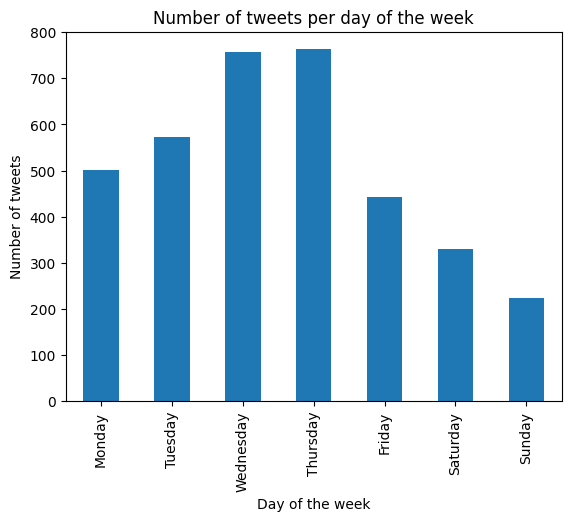

In [ ]:
# Using the matplotlib package, create a graph showing the number of tweets per day of the week.
# Show days of the week in order from Monday to Sunday.

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=days_order, ordered=True)
df['day_of_week'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Day of the week')
plt.ylabel('Number of tweets')
plt.title('Number of tweets per day of the week')
plt.show()
